###Feature Extraction
We are going to use GPU in this notebook.

In [1]:
!nvidia-smi

Sun Sep 26 04:53:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import zipfile

#Download Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip File

zip_data = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_data.extractall()
zip_data.close()

--2021-09-26 04:53:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  43.3MB/s    in 3.7s    

2021-09-26 04:53:24 (43.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE = (250,250)
BATCH_SIZE = 32

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)


In [4]:
train_data = train_datagen.flow_from_directory(train_dir, target_size = IMG_SHAPE, 
                                               class_mode = 'categorical', 
                                               batch_size = BATCH_SIZE)
print("Train Data Completed.....!!!!!!!!!!")

test_data = test_datagen.flow_from_directory(test_dir, target_size = IMG_SHAPE, 
                                               class_mode = 'categorical', 
                                               batch_size = BATCH_SIZE)
print("Test Data Completed.....!!!!!!!!!!")

Found 750 images belonging to 10 classes.
Train Data Completed.....!!!!!!!!!!
Found 2500 images belonging to 10 classes.
Test Data Completed.....!!!!!!!!!!


### Callbacks Introdution
Callbacks are a tool which can add helpful functionality to your models during training, evaluations or inference

### Some Populat callbacks includes: 
1. TensorBoard
2. Model Checkpointing
3. Early Stopping

In [6]:
import tensorflow as tf

In [7]:
def tensorboard_callbacks(dir, name):
  log_dir = dir + "/" + name
  TB_Callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  return TB_Callback

In [8]:
# Here we are comparing the two TensorFlow Hub model

resnet = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"
efficientnet = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"


In [10]:
import tensorflow_hub as hub

In [15]:
IMG_SHAPE += (3,)

In [35]:
resnet_model = tf.keras.Sequential([
  hub.KerasLayer(resnet, trainable = False , input_shape = IMG_SHAPE),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

resnet_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['Accuracy']
)

In [32]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1001)              25615849  
_________________________________________________________________
dense_12 (Dense)             (None, 100)               100200    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 25,717,059
Trainable params: 101,210
Non-trainable params: 25,615,849
_________________________________________________________________


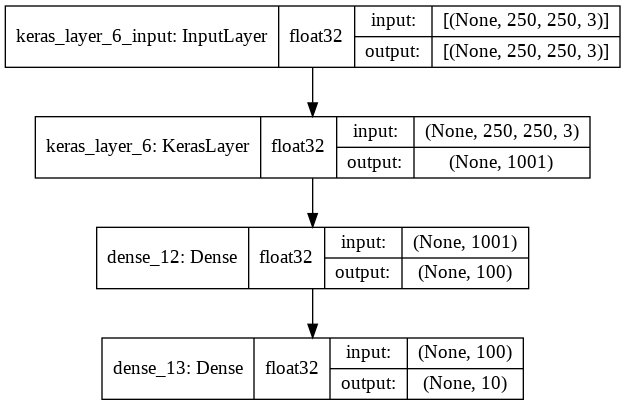

In [33]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True, show_dtype=True)

In [36]:
resnet_hist = resnet_model.fit(train_data, epochs = 5, validation_data=test_data, 
                                 callbacks=tensorboard_callbacks("/content/TF_HUB", "Resnet50V2"))



Epoch 1/5
24/24 [==============================] - 30s 1s/step - loss: 1.5252 - Accuracy: 0.5213 - val_loss: 0.8300 - val_Accuracy: 0.7208
Epoch 2/5
24/24 [==============================] - 24s 1s/step - loss: 0.5119 - Accuracy: 0.8320 - val_loss: 0.6714 - val_Accuracy: 0.7684
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.2871 - Accuracy: 0.9120 - val_loss: 0.6533 - val_Accuracy: 0.7836
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.1727 - Accuracy: 0.9627 - val_loss: 0.6470 - val_Accuracy: 0.7876
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.1100 - Accuracy: 0.9867 - val_loss: 0.6562 - val_Accuracy: 0.7932


In [37]:
import matplotlib.pyplot as plt


In [46]:
def plot_graph(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  Accuracy = history.history['Accuracy']
  val_Accuracy = history.history['val_Accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Epochs Vs Loss')
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.legend()


  plt.figure()
  plt.plot(epochs, Accuracy, label = 'Training Accuracy')
  plt.plot(epochs, val_Accuracy, label = 'Validation Accuracy')
  plt.title('Epochs Vs Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.legend()

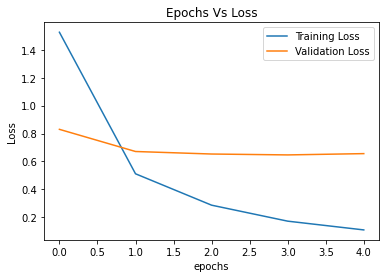

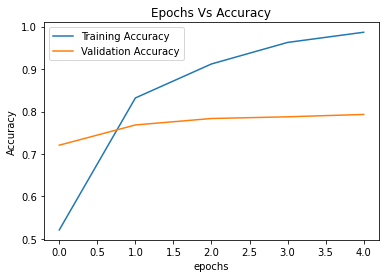

In [47]:
plot_graph(resnet_hist)

In [57]:
efficientnet_model = tf.keras.Sequential([
  hub.KerasLayer(efficientnet, trainable = False , input_shape = IMG_SHAPE),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

efficientnet_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['Accuracy']
)

In [53]:
efficientnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_9 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_18 (Dense)             (None, 100)               204900    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 23,770,710
Trainable params: 205,910
Non-trainable params: 23,564,800
_________________________________________________________________


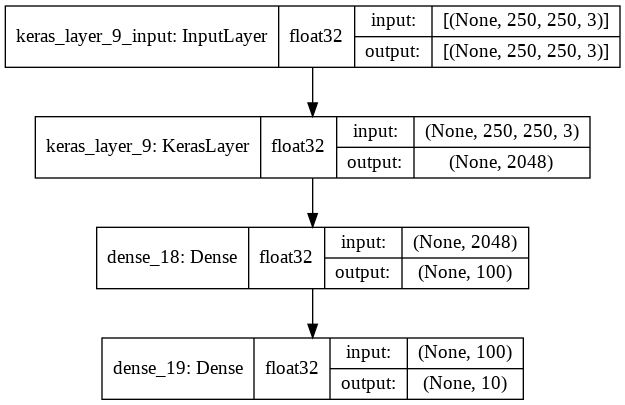

In [54]:
tf.keras.utils.plot_model(efficientnet_model, show_shapes=True, show_dtype=True)

In [58]:
efficientnet_hist = efficientnet_model.fit(train_data, epochs = 5, validation_data=test_data, 
                                           callbacks=tensorboard_callbacks("/content/TF_HUB", "efficientnet"))

Epoch 1/5
24/24 [==============================] - 31s 1s/step - loss: 1.5576 - Accuracy: 0.5027 - val_loss: 0.8492 - val_Accuracy: 0.7320
Epoch 2/5
24/24 [==============================] - 25s 1s/step - loss: 0.5757 - Accuracy: 0.8253 - val_loss: 0.6365 - val_Accuracy: 0.7908
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.2943 - Accuracy: 0.9200 - val_loss: 0.5770 - val_Accuracy: 0.8168
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.1789 - Accuracy: 0.9680 - val_loss: 0.5637 - val_Accuracy: 0.8132
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.1134 - Accuracy: 0.9920 - val_loss: 0.5638 - val_Accuracy: 0.8188


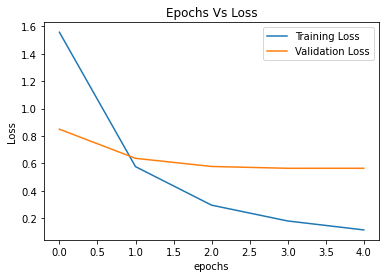

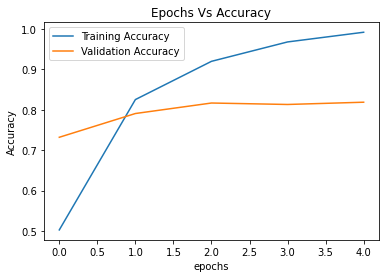

In [59]:
plot_graph(efficientnet_hist)

In [61]:
#Upload Tensorboard Records

In [ ]:
!tensorboard dev upload --logdir ./TF_HUB/ \
  --name "Resnet50V2 Vs EffitientnetB0" \
  --description "Comparing 2 different Models" \
  --one_shot